In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
#rc('text', usetex=False) # para usar latex en matplotlib
from matplotlib import animation # animaciones
import numpy as np
from scipy.sparse import diags, kron, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve, norm, inv, eigsh
import pandas as pd
import scipy as sp

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Emir Chacra

**Integrantes:** Sebastián Cobaise;
                 Arturo Lazcano; Benjamín Tardy D.

# Laboratorio 3

El objetivo de este laboratorio es entender e implementar un esquema numérico basado en elementos finitos de Lagrange para una ecuacion elíptica de segundo orden en una dimensión con condiciones de frontera Dirichlet.

Sean $\alpha,\beta,u_{\alpha},u_{\beta}\in\mathbb{R}$, $\varepsilon>0$,
$\Omega=\left(  \alpha,\beta\right)  $, $a\in W^{1,\infty}\left(
\Omega\right)  $, $b\in L^{\infty}\left(  \Omega\right)  $ y $f\in
L^{2}\left(  \Omega\right)  $. 

Considere la siguiente ecuación de difusión-advección-reacción dada por
$\begin{align}
-\varepsilon u^{\prime\prime}+au^{\prime}+bu  &  =f\qquad\text{sobre }%
\Omega\nonumber\\
u\left(  \alpha\right)   &  =u_{\alpha}\tag{P}\\
u\left(  \beta\right)   &  =u_{\beta}\nonumber
\end{align}$

### **Ejercicio 1:**

Programe una funcion que resuelva numéricamente el problema (P) usando el metodo descrito. Las entradas del programa deben ser la discretización $\{x_j\}^{N+1}_{j=0}$ como un vector ordenado, $u_\alpha$,$u_\beta$, $\varepsilon$, $a$, $b$ y $f$. 

La salida de este programa debe ser un vector del mismo tamaño que la discretización con las soluciones discretas del esquema.

In [17]:
def Resuelve(x,ualpha,ubeta,eps,a,b,f):
  N=len(x)-2
  A1=np.zeros((N,N))
  A2=np.zeros((N,N))
  A3=np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      if i==j:
        A1[i,j]=1/(x[i+1]-x[i]) + 1/(x[i+2]-x[i+1])
        A3[i,j]=2*((x[i+1]-x[i])+(x[i+2]-x[i+1]))
      if i==j+1:
        A1[i,j]=-1/(x[i+1]-x[i])
        A2[i,j]=-1/2
        A3[i,j]=(x[i+1]-x[i])
      if j==i+1:
        A1[i,j]=-1/(x[j+1]-x[j])
        A2[i,j]=1/2
        A3[i,j]=(x[j+1]-x[j])
  
  A1=eps*A1
  A2=a*A2
  A3=(b/6)*A3

  A=A1+A2+A3

  fh=np.zeros(N)
  for i in range(N):
    fh[i]=(x[i+2]-x[i+1])*(f(x[i+1])+2*f((x[i+1]+x[i+2])/2))+(x[i+1]-x[i])*(f(x[i+1])+2*f((x[i]+x[i+1])/2))
  fh=(1/6)*fh
  poplolita=np.zeros(N)
  poplolita[0]=(-eps/(x[1]-x[0])-a/2+b/6*(x[1]-x[0]))*ualpha
  poplolita[N-1]=(-eps/(x[N+1]-x[N])+a/2+b/6*(x[N+1]-x[N]))*ubeta

  lado_derecho=fh-poplolita
  u = sp.sparse.linalg.spsolve(A,lado_derecho)
  u1 = np.insert(u,0,ualpha,axis=0)
  u2 = np.insert(u1,N+1,ubeta,axis=0)
  return u2

### **Ejercicio 2:** 
Considere $f\equiv1$, $a=1$, $b=0$ y $\Omega=\left(  0,1\right)  $.

Para $u_{\alpha}=u_{\beta}=0$, la solución analítica de $\textbf{(P)}$ es única e igual a la
función
$$
u(x)=x-\dfrac
{\exp\left(  \frac{x-1}{\varepsilon}\right)  -\exp\left(  -\frac
{1}{\varepsilon}\right)  }{1-\exp\left(  -\frac{1}{\varepsilon}\right)}\hspace{1cm} \forall x\in\left[  0,1\right] 
$$

a. Para una discretización uniforme con $N \in \{5, 10, 20\}$ elementos (es decir, $h_j = h = \frac{1}{N+1}$), calcule la solución numérica cuando $\varepsilon = 1$. Grafique todas las soluciones numéricas y la solución analítica (esta última discretizada en una gran cantidad de puntos equiespaciados) en una misma gráfica. Comente sus observaciones.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


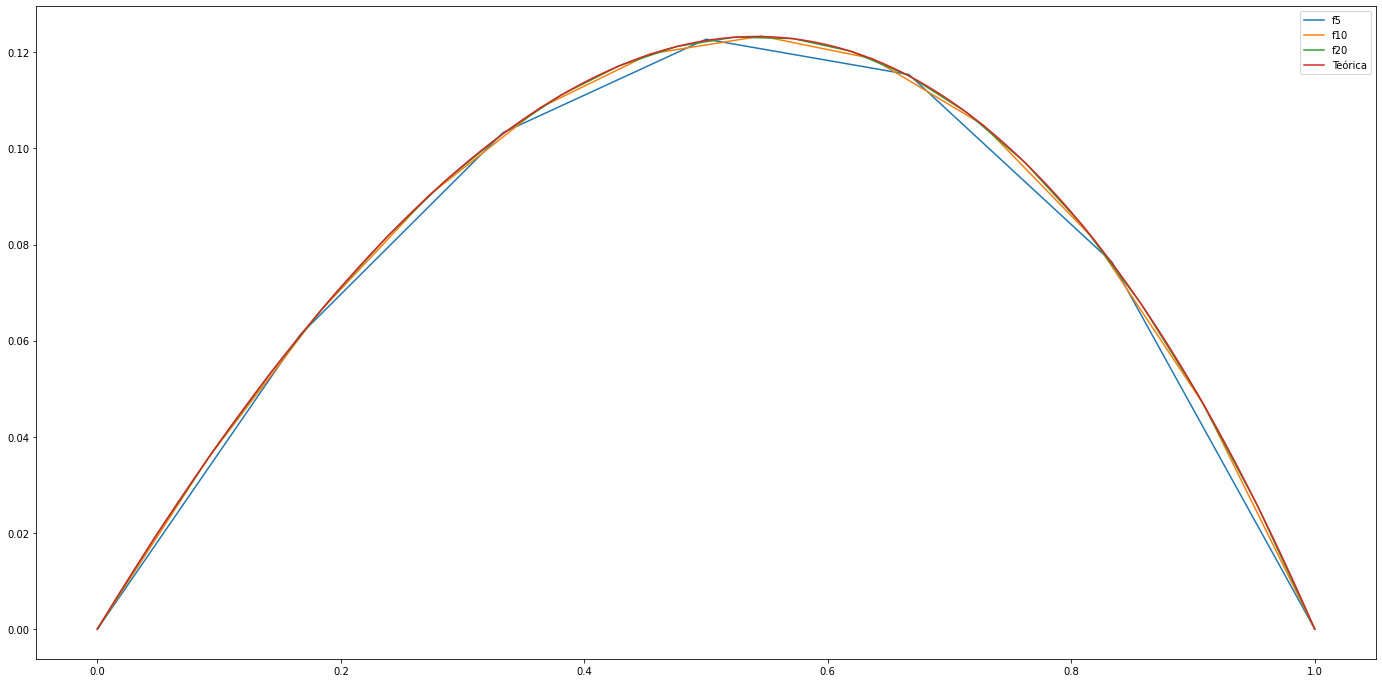

In [46]:
#Parametros
f = lambda x: 1

eps=1

g = lambda x: x - ((np.exp((x-1)/eps) - (np.exp((-1)/eps)))/(1-np.exp(-1/eps)))

a=1
b=0
ualpha=0
ubeta=0

N1 = 5
N2 = 10
N3 = 20

x1 = np.linspace(a, b, N1+2)
x2 = np.linspace(a, b, N2+2)
x3 = np.linspace(a, b, N3+2)
x4 = np.linspace(a, b, 1000)

u1 = Resuelve(x1,ualpha,ubeta,eps,a,b,f)
u2 = Resuelve(x2,ualpha,ubeta,eps,a,b,f)
u3 = Resuelve(x3,ualpha,ubeta,eps,a,b,f)

h1 = 1/(N1+1)
h2 = 1/(N2+1)
h3 = 1/(N3+1)

x1 = np.linspace(a, b, N1+2) 
x2 = np.linspace(a, b, N2+2)
x3 = np.linspace(a, b, N3+2)

# Definamos una figura para graficar.
fig = plt.figure(figsize=(24, 12)) #Bueno para elegir el porte con figsize
plt.plot(x1, u1, label= 'f5')
plt.plot(x2, u2, label= 'f10')
plt.plot(x3, u3, label= 'f20')
plt.plot(x4, g(x4), label= 'Teórica')
plt.legend()

Se observa que los resultados discretos calculados aproximan de buena manera a la solución analítica cuando $\varepsilon$ = 1. Incluso cuando N=5, aunque la solución es poco fina, los puntos en los que esta está definida se acercan muy bien a la solución teórica. Para N = 20 la diferencia entre esta y la teórica es prácticamente imperceptible.

b. Repita lo anterior para $\varepsilon = 10^{−j}$ , con $j \in \{1, 2, 3\}$ y $N \in \{10, 25, 50, 100, 250, 500, 1000\}$. Gráfique los tres primeros valores de $N$ en una figura, los dos siguientes en una distinta y los últimos dos en otra. 
    
Comente sus observaciones.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseE

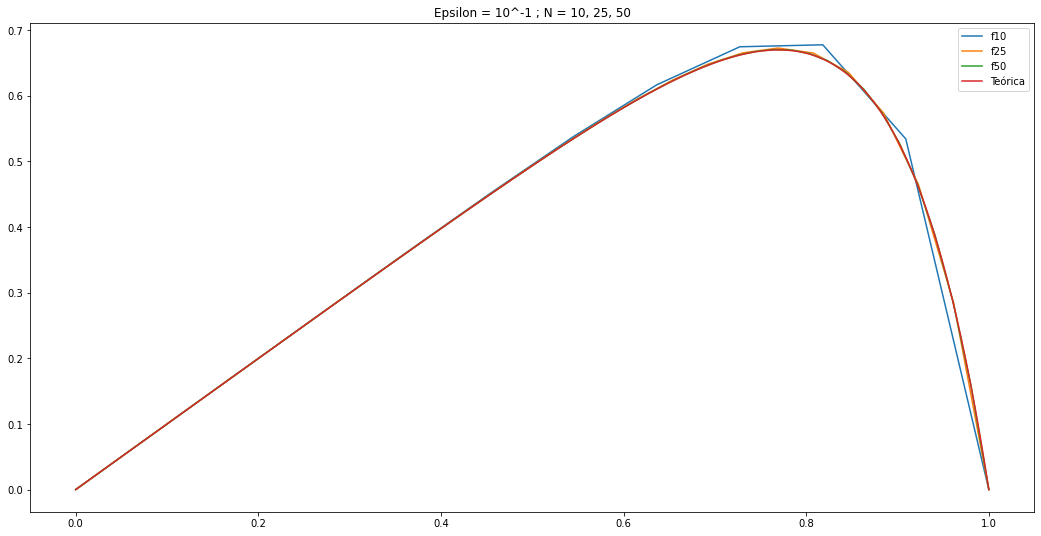

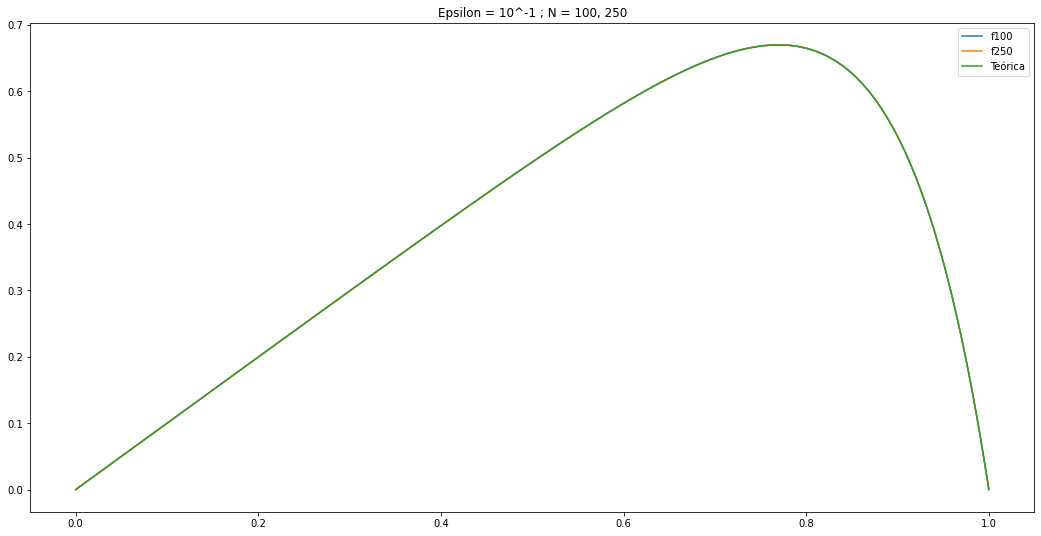

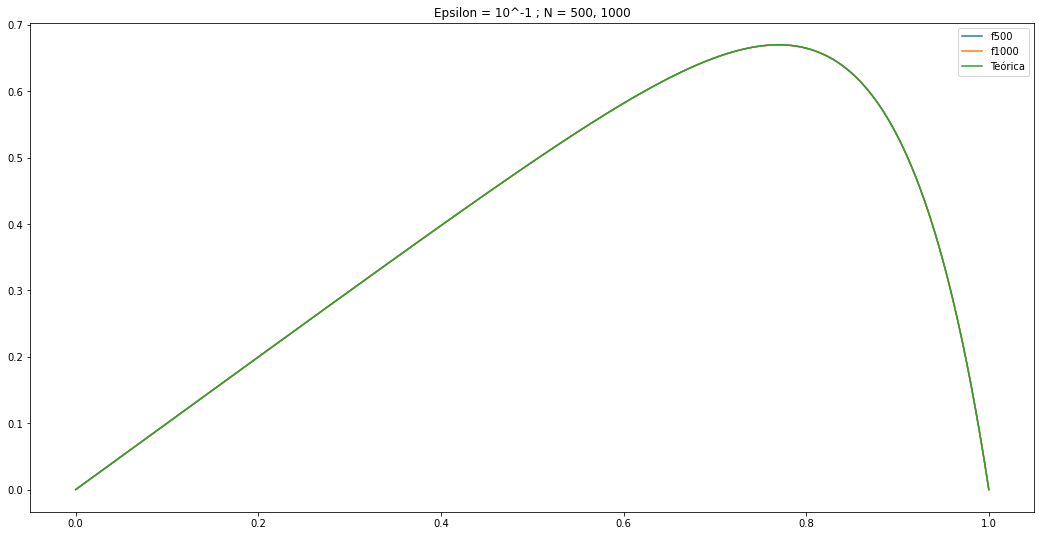

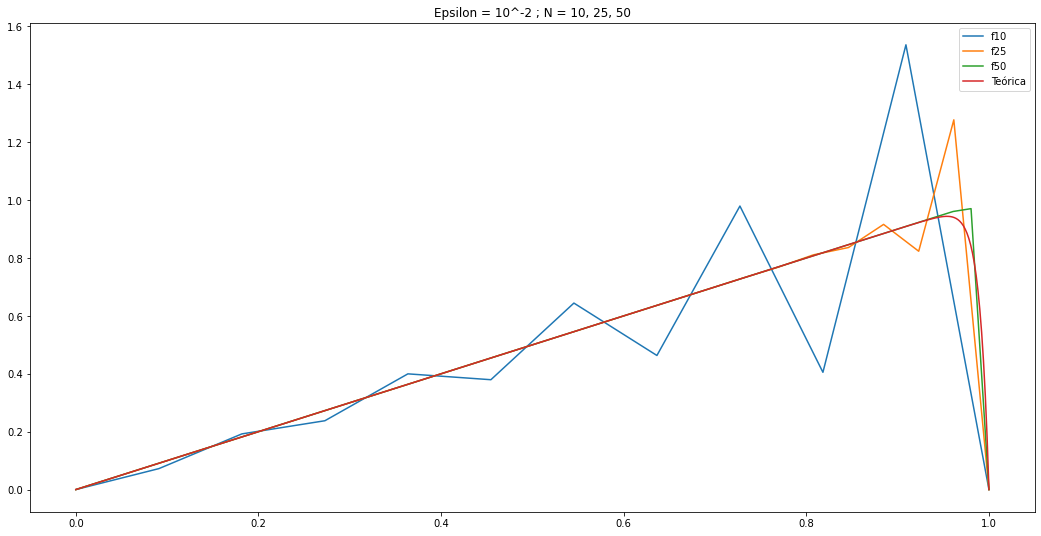

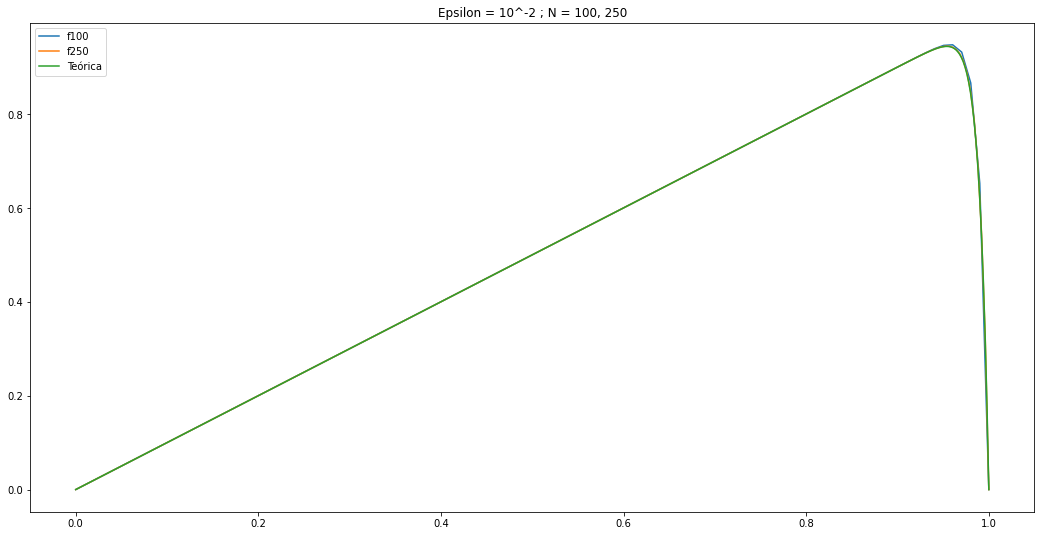

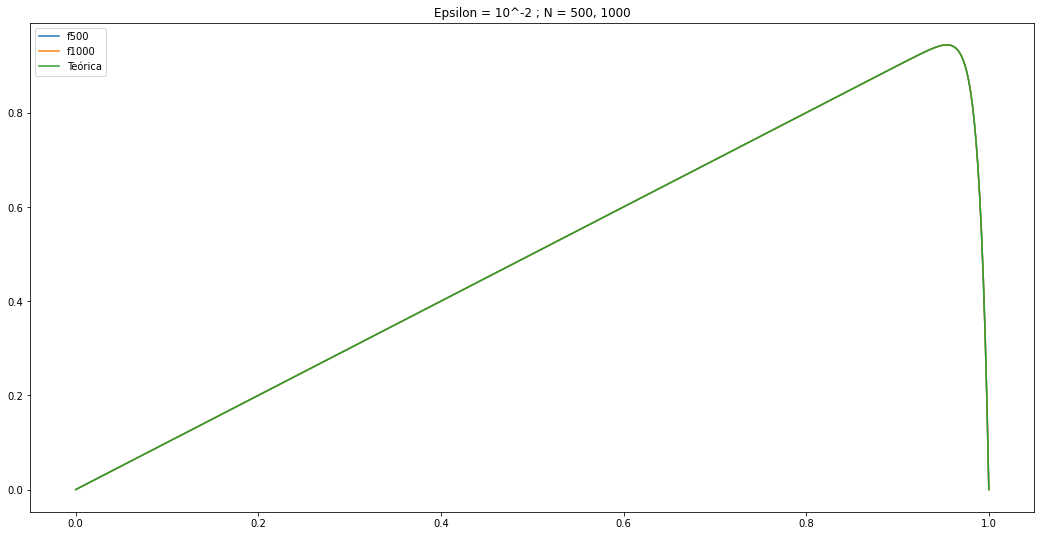

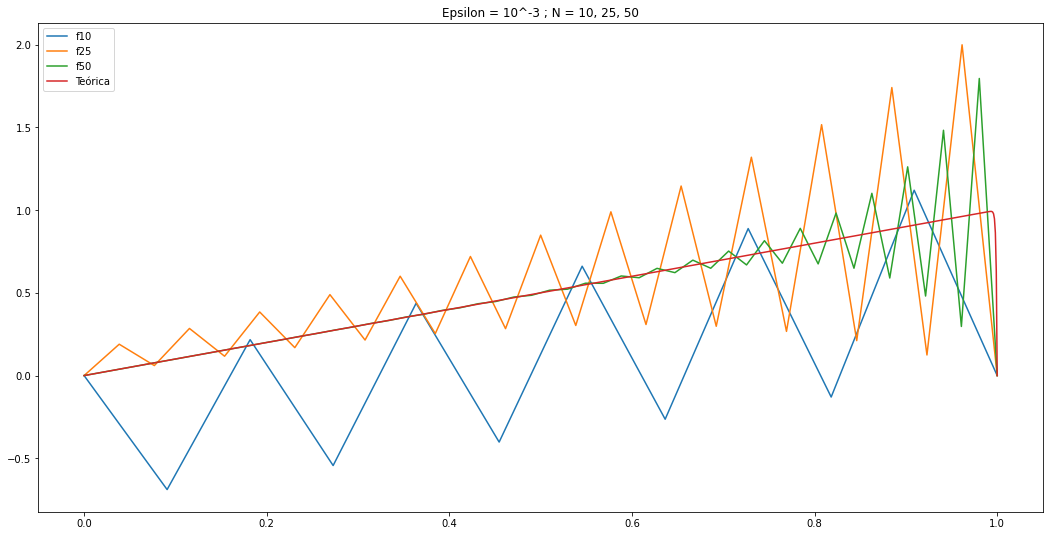

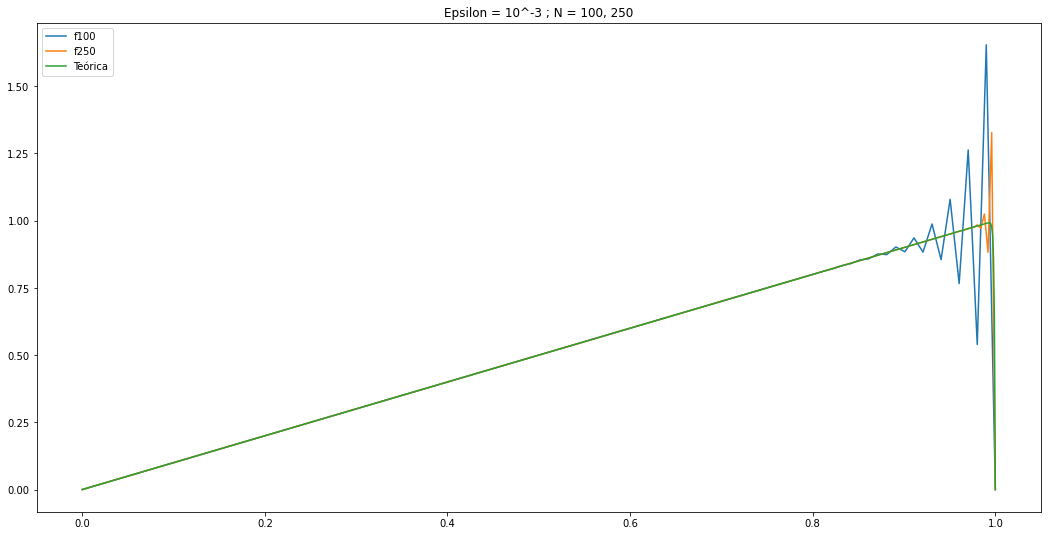

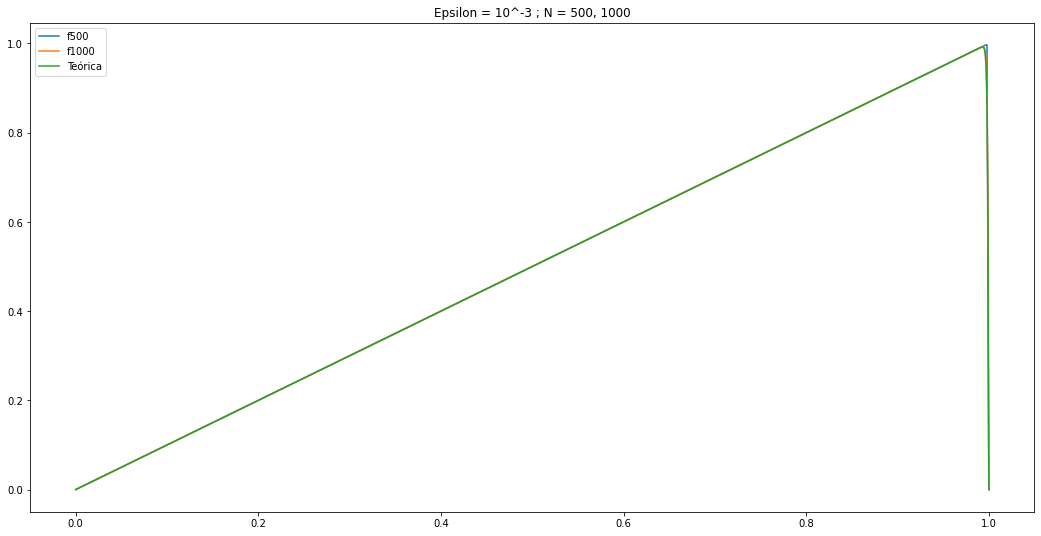

In [47]:
for j in [1,2,3]:
  #Parametros
  f = lambda x: 1
  eps=10**(-j)
  g = lambda x: x - ((np.exp((x-1)/eps) - (np.exp((-1)/eps)))/(1-np.exp(-1/eps)))
  a=1
  b=0
  ualpha=0
  ubeta=0

  N1 = 10
  N2 = 25
  N3 = 50

  x1 = np.linspace(a, b, N1+2)
  x2 = np.linspace(a, b, N2+2)
  x3 = np.linspace(a, b, N3+2)
  x10 = np.linspace(a, b, 1000)

  u1 = Resuelve(x1,ualpha,ubeta,eps,a,b,f)
  u2 = Resuelve(x2,ualpha,ubeta,eps,a,b,f)
  u3 = Resuelve(x3,ualpha,ubeta,eps,a,b,f)

  # Definamos una figura para graficar.
  fig = plt.figure(figsize=(18, 9)) 
  plt.plot(x1, u1, label= 'f10')
  plt.plot(x2, u2, label= 'f25')
  plt.plot(x3, u3, label= 'f50')
  plt.plot(x10, g(x10), label= 'Teórica')
  plt.title('Epsilon = 10^' + str(-j) + " ; N = 10, 25, 50")
  plt.legend()

  #Parametros

  N4 = 100
  N5 = 250

  x4 = np.linspace(a, b, N4+2)
  x5 = np.linspace(a, b, N5+2)
  
  u4 = Resuelve(x4,ualpha,ubeta,eps,a,b,f)
  u5 = Resuelve(x5,ualpha,ubeta,eps,a,b,f)

  # Definamos una figura para graficar.
  fig = plt.figure(figsize=(18, 9))
  plt.plot(x4, u4, label= 'f100')
  plt.plot(x5, u5, label= 'f250')
  plt.plot(x10, g(x10), label= 'Teórica')
  plt.title('Epsilon = 10^' + str(-j) + " ; N = 100, 250")
  plt.legend()

  #Parametros

  N6 = 500
  N7 = 1000

  x6 = np.linspace(a, b, N6+2)
  x7 = np.linspace(a, b, N7+2)

  u6 = Resuelve(x6,ualpha,ubeta,eps,a,b,f)
  u7 = Resuelve(x7,ualpha,ubeta,eps,a,b,f)

  # Definamos una figura para graficar.
  fig = plt.figure(figsize=(18, 9)) 
  plt.plot(x6, u6, label= 'f500')
  plt.plot(x7, u7, label= 'f1000')
  plt.plot(x10, g(x10), label= 'Teórica')
  plt.title('Epsilon = 10^' + str(-j) + " ; N = 500, 1000")
  plt.legend()

Es posible apreciar que a medida que $ɛ$ se hace cada vez más pequeño, las diferencias existentes entre las soluciones discretas y la solución teórica se comienza a hacer cada vez más notorias. Cuando $ɛ$ = $10^{-1}$, un valor de N mayor a 25 ya entrega un resultado discreto bastante similar al teórico. Cuando $ɛ$ = $10^{-2}$, un valor de N mayor a 100 ya entrega un resultado discreto bastante similar al teórico. Para $ɛ$ = $10^{-3}$, las diferencias comienzan a ser casi imperceptible cuando N toma valores mayores a 500. En conclusión, a medida que el $ɛ$ disminuye se comienzan a necesitar valores de N cada vez más grandes para obtener una solución que satisfactoria. 

##### Estimación del error


**Teorema:** Sean $\alpha,\beta,u_{\alpha},u_{\beta}\in\mathbb{R}$, $\varepsilon>0$,
$\Omega=\left(  \alpha,\beta\right)  $, $a\in W^{1,\infty}\left(
\Omega\right)  $, $b\in L^{\infty}\left(  \Omega\right)  $ y $f\in
L^{2}\left(  \Omega\right)  $. 
Considere $u$ y $u_{h}$ soluciones únicas de (FV) y (FVD), respectivamente. Entonces, existen constantes $C_{0}>0$ y $C_{1}>0$, independientes de $h$, tales que:
$$
\left\Vert u-u_{h}\right\Vert _{0,\Omega}\leq C_{0}h^{2}\hspace{1cm
}\left\vert u-u_{h}\right\vert _{1,\Omega}\leq C_{1}h
$$


Para hacer este cálculo de forma eficiente, se elegirá una regla de cuadratura conveniente. En primer lugar,
$$\left\Vert u-u_{h}\right\Vert _{0,\Omega}^{2}=\sum_{j=1}^{N}\int_{T_{j}%
}\left(  u\left(  x\right)  -u_{h}\right)  ^{2}\text{ }dx
$$
donde $u_{h}$ es de grado a lo más $1$. Aplicando la regla de Simpson, se
tiene que:
$$
\left\Vert u-u_{h}\right\Vert _{0,\Omega}^{2}=\sum_{j=1}^{N}\dfrac{h_{j}}{6}\left[  \left(  u\left(  x_{j}\right)  -u_{j}^{h}\right)  ^{2}+4\left(
u\left(  \bar{x}_{j}\right)  -\dfrac{u_{j}^{h}+u_{j}^{h}}{2}\right)
^{2}+\left(  u\left(  x_{j+1}\right)  -u_{j+1}^{h}\right)  ^{2}\right]
+\mathcal{O}\left(  h_{j}^{5}\right)
$$
Luego, repitiendo el mismo análisis, se tiene que:
$$
\left\vert u-u_{h}\right\vert _{1,\Omega}^{2}=\sum_{j=1}^{N}\int_{T_{j}%
}\left(  u^{\prime}\left(  x\right)  -u_{h}^{\prime}\right)  ^{2}\text{ }dx
$$
donde $u_{h}^{\prime}$ es una función constante a trozos. Entonces, aplicando
la regla del punto medio, se cumple que:
$$
\left\vert u-u_{h}\right\vert _{1,\Omega}^{2}=\sum_{j=1}^{N}h_{j}\left(
u^{\prime}\left(  \bar{x}_{j}\right)  -\dfrac{u_{j+1}-u_{j}}{h_{j}}\right)
^{2}+\mathcal{O}\left(  h_{j}^{3}\right)
$$




c. Considere ahora $\varepsilon = 0.01$ y una discretización uniforme con $N \in \{5, 10, 20, 40, 80, 160, 320, 640, 1280\}$ elementos (es decir, $h_j = h = \frac{1}{N}$). Estime el error en las normas $L^2(\Omega)$, $H^1(\Omega)$ y en la seminorma de $H^1(\Omega)$, grafíquelos y tabúlelos en función de $h$. Para ello, cree una función que permita obtener esos errores. Dicha función debe tener como entradas la discretización del dominio, el vector solución del primer ejercicio, la solución real y su derivada. Las salidas deben ser las normas del error en los espacios $L^2(\Omega)$ y $H^1(\Omega)$, y la seminorma del error en el espacio $H^1(\Omega)$. 

Comente sus resultados.
    
**Indicación:** Puede ser útil usar escala logarítmica para la gráfica de errores. Asimismo, puede resultar útil usar curvas de la forma $Ch$ o $Ch^2$ para comparar las curvas de error con sus respectivos ordenes de convergencia.

In [ ]:
def calcular_errores(eps, Ns, f):
    """Calcula el error de la solucion al problema (1) para una lista de valores de N"""
   
    return hs, error


In [ ]:
def tabulador(eps, Ns, f):
    
    return 

### **Ejercicio 3:** 
Considere $f\equiv1$, $a=0$, $b=1$ y $\Omega=\left(  0,1\right)  $.

Para $u_{\alpha}=1, u_{\beta}=0$, la solución analítica de $\textbf{(P)}$ es única e igual a la
función
$$
u(x)=1-\dfrac
{\sinh\left(\varepsilon^{\frac{-1}{2}}x\right)  }{\sinh\left(\varepsilon^{\frac{-1}{2}}\right)}\hspace{1cm} \forall x\in\left[  0,1\right] 
$$

a. Para una discretización uniforme con $N \in \{5, 10, 20, 40, 80\}$ elementos (es decir, $h_j = h = \frac{1}{N+1}$), calcule la solución numérica cuando $\varepsilon = 1$. Grafique todas las soluciones numéricas y la solución analítica (esta última discretizada en una gran cantidad de puntos equiespaciados) en una misma gráfica. Comente sus observaciones.

In [ ]:
#Parametros
f=
a=
b=
ualpha=
ubeta=

b. Repita lo anterior para $\varepsilon = 10^{−j}$ , con $j \in \{1, 2, 3\}$ y $N \in \{10, 25, 50, 100, 250, 500, 1000\}$. Gráfique los tres primeros valores de $N$ en una figura, los dos siguientes en una distinta y los últimos dos en otra. 
    
    Comente sus observaciones.

c. Considere ahora $\varepsilon = 10^{-4}$ y una discretización uniforme con $N \in \{5, 10, 20, 40, 80, 160, 320, 640, 1280\}$ elementos (es decir, $h_j = h = \frac{1}{N+1}$). Estime el error en las normas $L^2(\Omega)$, $H^1(\Omega)$ y en la seminorma de $H^1(\Omega)$, grafíquelos y tabúlelos en función de $h$. Para ello, cree una función que permita obtener esos errores. Dicha función debe tener como entradas la discretización del dominio, el vector solución del primer ejercicio, la solución real y su derivada. Las salidas deben ser las normas del error en los espacios $L^2(\Omega)$ y $H^1(\Omega)$, y la seminorma del error en el espacio $H^1(\Omega)$. 

    Comente sus resultados.
    
    **Indicación:** Puede ser útil usar escala logarítmica para la gráfica de errores. Asimismo, puede resultar útil usar curvas de la forma $Ch$ o $Ch^2$ para comparar las curvas de error con sus respectivos ordenes de convergencia.

In [ ]:
def calcular_errores(eps, Ns, f):
    """Calcula el error de la solucion al problema (2) para una lista de valores de N"""
   
    
    return hs,error

In [ ]:
def tabulador(eps, Ns, f):
    
    return 